## Hausarbeit 5.1
Experimentieren Sie mit der Anzahl der versteckten Neuronen und der 
Lernrate. Welche Änderungen erzeugen ein lineares Ausgangsverhalten
und welche Änderungen führen zu starkem “Overfitting”?


<span style="color:red">**Anmerkung: Die Beantwortung der Fragen finden Sie am Ende dieses Notebooks**</span>

In [70]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import os
import torch.nn as nn
from collections import OrderedDict
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [71]:
torch.set_printoptions(edgeitems=2, linewidth=75)
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 

In [72]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [73]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [74]:
# Definition des Trainingloops
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [75]:
hidden_layers = 60
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_layers)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_layers, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-2) 

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 226.9745, Validation loss 22.6129
Epoch 1000, Training loss 15.4706, Validation loss 9.2245
Epoch 2000, Training loss 4.5513, Validation loss 7.8267
Epoch 3000, Training loss 1.5865, Validation loss 7.0023
Epoch 4000, Training loss 1.3513, Validation loss 6.9144
Epoch 5000, Training loss 1.3124, Validation loss 6.8955


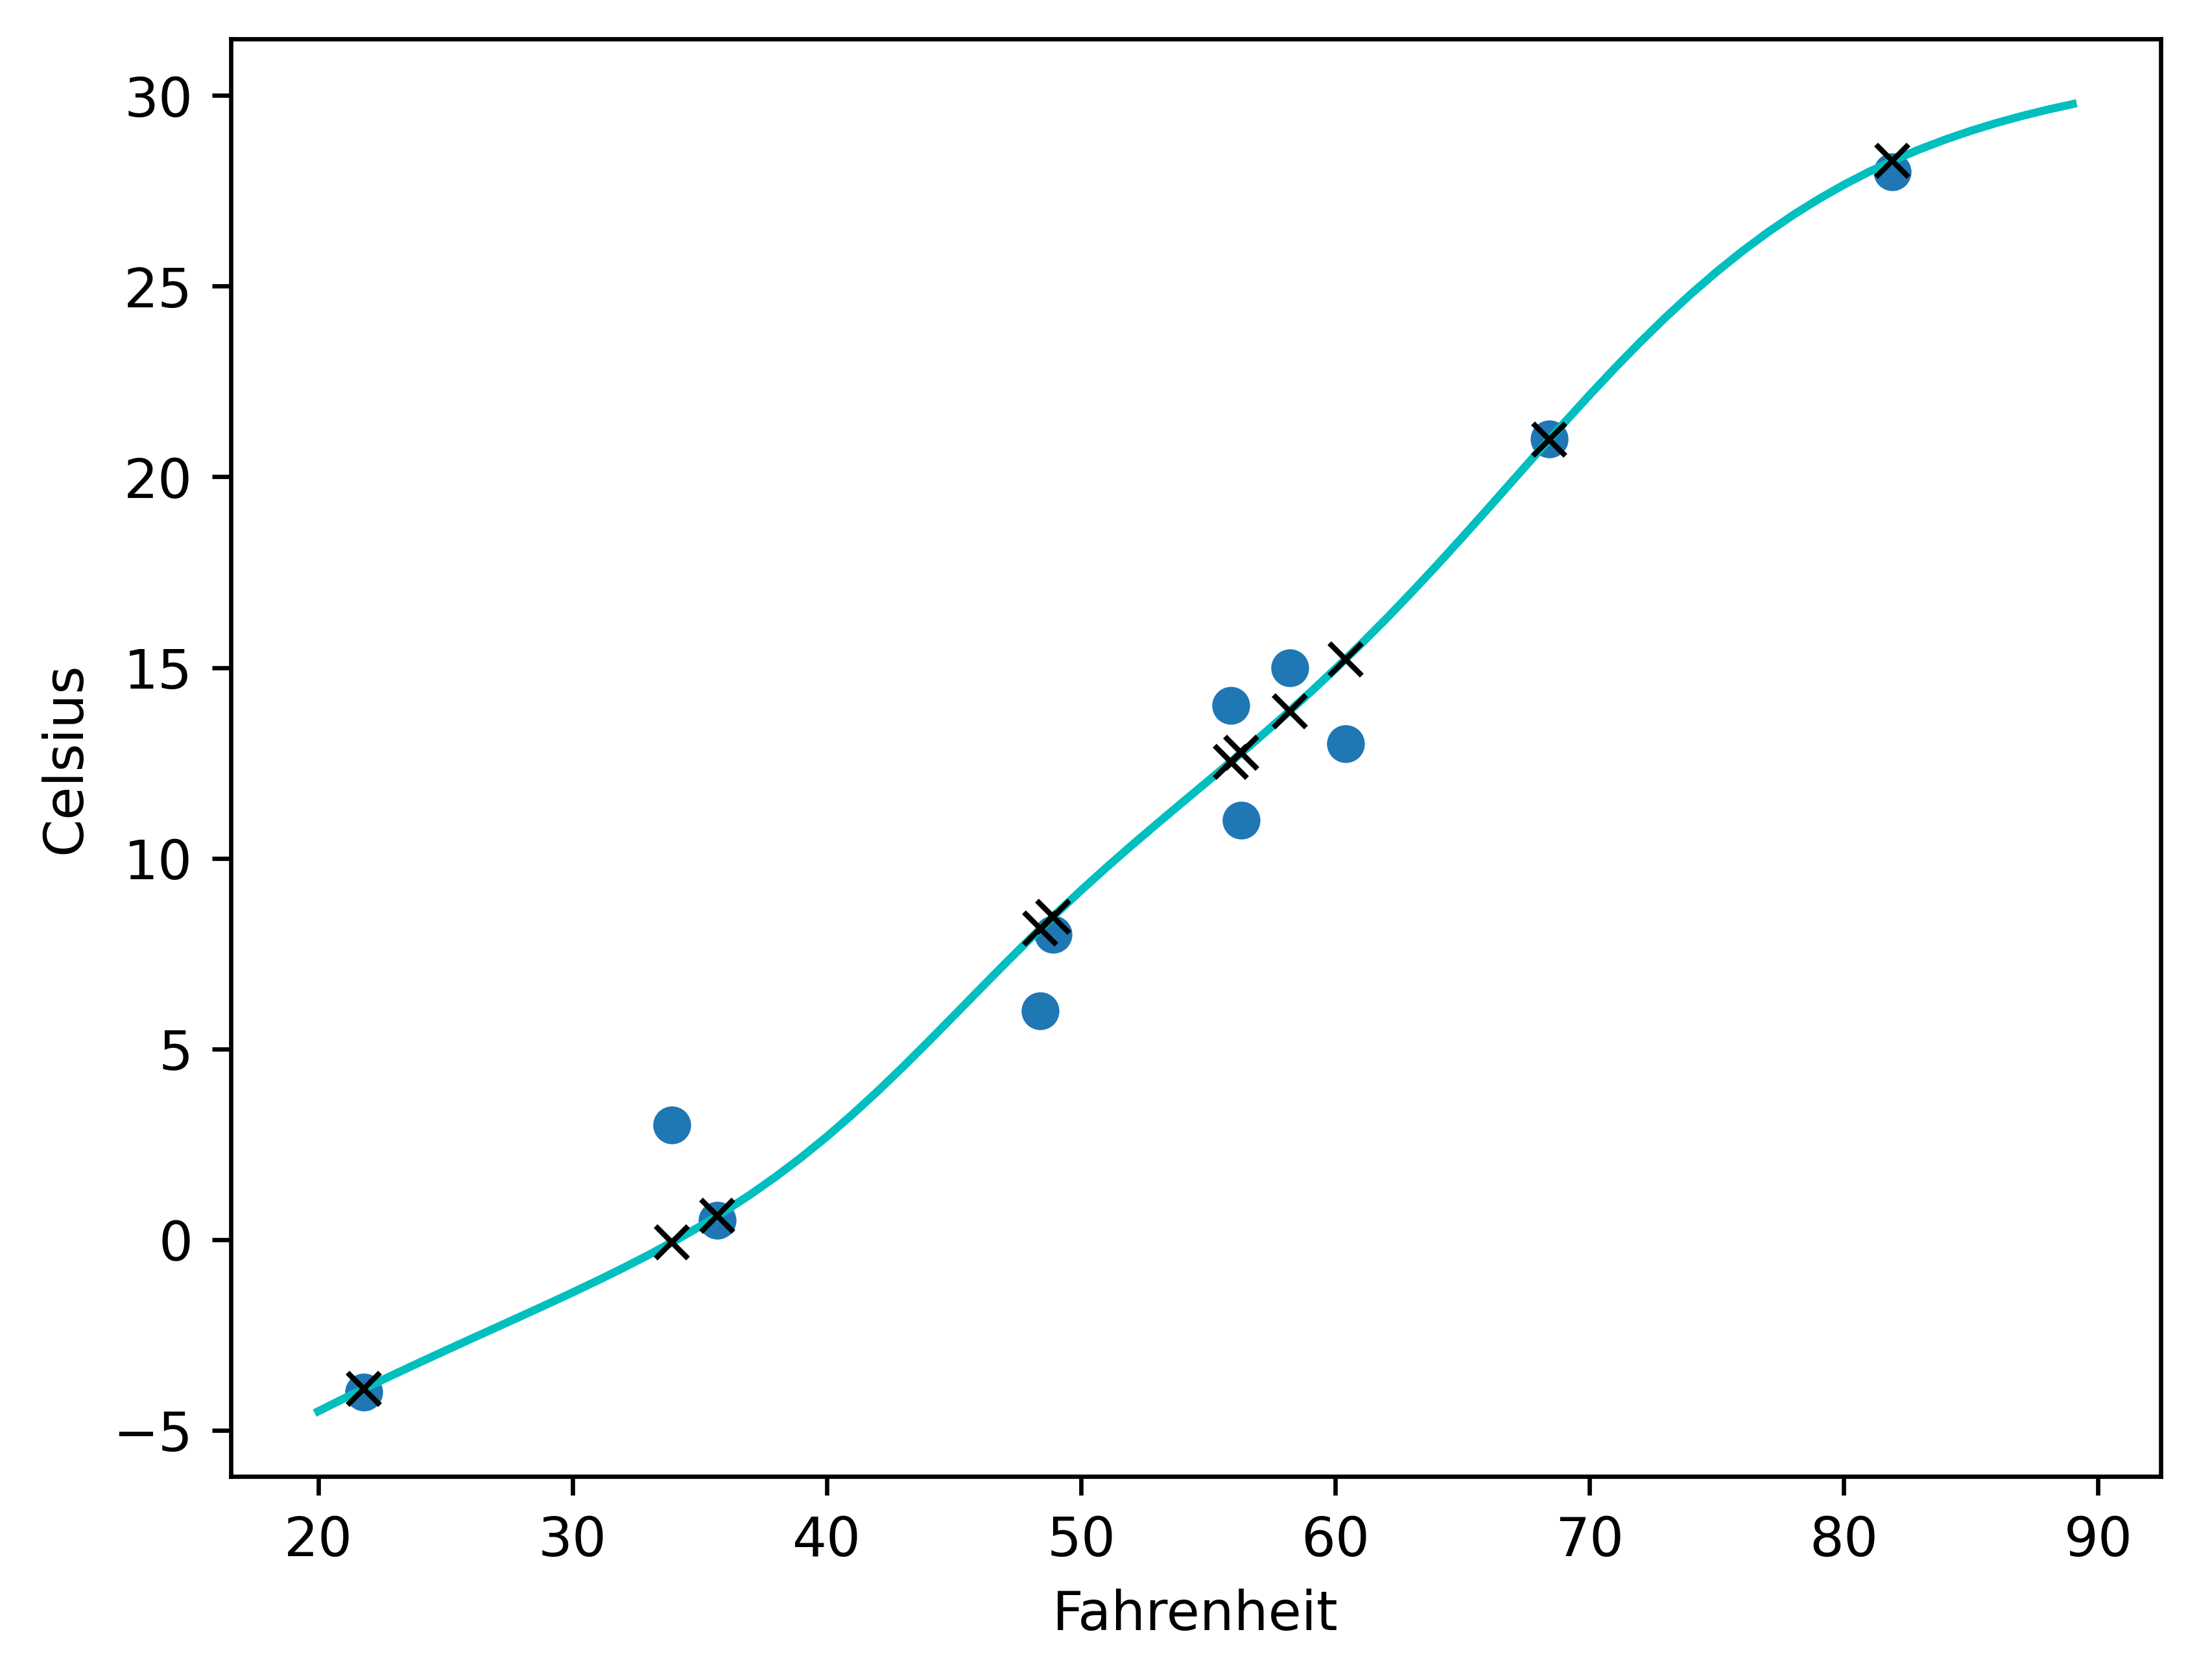

In [76]:
t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')